In [1]:
%cd ..

/Users/peli/Projects/Repositories/DDM-NumEstPark


In [2]:
import numpy as np
import pymc as pm
import pytensor.tensor as pt
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az

from src.recovery import simulate_hierarchical_data, run_parameter_sweep, plot_sweep_results, run_sensitivity_analysis, plot_sensitivity
from src.model import build_hierarchical

In [6]:
import numpy as np

# --- 1. Base Parameters (The "Safe" Zone) ---
# These should be values where you KNOW the model recovers well.
# We will revert to these values for every parameter NOT currently being tested.
base_params = {
    'alpha_group_mu': np.array([1.0, 1.0]),
    'alpha_group_sigma': np.array([0.1, 0.1]),
    'beta_group_mu': np.array([0.5, 0.5]),
    'beta_group_sigma': np.array([0.05, 0.05]),
    'delta_alpha_group_entity': np.zeros((2, 2)),
    'delta_beta_group_entity': np.zeros((2, 2)),
    'sigma_0_group': 1.0, 
    'sigma_1_group': 0.1  
}

# --- 2. Sensitivity Configuration (The "Stress Test") ---
# We test these one key at a time. 
sensitivity_config = {
    # Test 1: Can we recover high means?
    'alpha_group_mu': [
        np.array([1.0, 1.0]),   # Control
        np.array([2.0, 2.0]),   # High
        np.array([4.0, 4.0])    # Extreme
    ],
    
    # Test 2: Can we recover linearity vs compression?
    'beta_group_mu': [
        np.array([0.5, 0.5]),   # Curve (Base)
        np.array([0.9, 0.9]),   # Near Linear
        np.array([1.2, 1.2])    # Super-linear (often hard for power laws)
    ],

    # Test 3: Can we handle high heterogeneity?
    'alpha_group_sigma': [
        np.array([0.1, 0.1]),   # Tight
        np.array([0.2, 0.2]),   # Loose
        np.array([.5, .5])    # Chaos
    ],

    # Test 4: Can we recover complex interactions?
    'delta_alpha_group_entity': [
        np.zeros((2, 2)),                       # Null
        np.array([[0.2, -0.2], [-0.2, 0.2]]),   # Crossover
        np.array([[0.5, 0.0], [0.0, -0.5]])     # Strong single effects
    ],
    
    # Test 5: Can the model handle noise?
    'sigma_0_group': [0.5, 2.0, 5.0, 10.0] 
}

test_sensitivity_config = {
    # Test 1: Can we recover high means?
    'alpha_group_mu': [
        np.array([1.0, 1.0]),   # Control
        np.array([4.0, 4.0])    # Extreme
    ],
    
    # Test 2: Can we recover linearity vs compression?
    'beta_group_mu': [
        np.array([0.9, 0.9]),   # Near Linear
    ]
}

In [7]:
# Define the sim_kwargs
sim_kwargs = {"n_subjects": 118, "n_reps": 10, "n_stim_minmax": [5,8], "samples": 1000, "tune": 500}

# Run the analysis using the MOCK builder
df_results = run_sensitivity_analysis(
    model_builder=build_hierarchical, 
    base_params=base_params, 
    sensitivity_config=sensitivity_config, 
    sim_kwargs=sim_kwargs
)


Starting Sensitivity Analysis...
Base Parameters: ['alpha_group_mu', 'alpha_group_sigma', 'beta_group_mu', 'beta_group_sigma', 'delta_alpha_group_entity', 'delta_beta_group_entity', 'sigma_0_group', 'sigma_1_group']

>>> TESTING PARAMETER: alpha_group_mu
   Step 1/3


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha_group_mu, alpha_group_sigma, beta_group_mu, beta_group_sigma, alpha_subj, beta_subj, delta_alpha_group_entity, delta_beta_group_entity, sigma_0_group, sigma_1_group, y_pp, y_latent]


Output()

Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 716 seconds.
There were 118 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


   Step 2/3


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha_group_mu, alpha_group_sigma, beta_group_mu, beta_group_sigma, alpha_subj, beta_subj, delta_alpha_group_entity, delta_beta_group_entity, sigma_0_group, sigma_1_group, y_pp, y_latent]


Output()

Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 1349 seconds.
There were 20 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


   Step 3/3


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha_group_mu, alpha_group_sigma, beta_group_mu, beta_group_sigma, alpha_subj, beta_subj, delta_alpha_group_entity, delta_beta_group_entity, sigma_0_group, sigma_1_group, y_pp, y_latent]


Output()

Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 2516 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details



>>> TESTING PARAMETER: beta_group_mu
   Step 1/3


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha_group_mu, alpha_group_sigma, beta_group_mu, beta_group_sigma, alpha_subj, beta_subj, delta_alpha_group_entity, delta_beta_group_entity, sigma_0_group, sigma_1_group, y_pp, y_latent]


Output()

Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 1342 seconds.
There were 55 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


   Step 2/3


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha_group_mu, alpha_group_sigma, beta_group_mu, beta_group_sigma, alpha_subj, beta_subj, delta_alpha_group_entity, delta_beta_group_entity, sigma_0_group, sigma_1_group, y_pp, y_latent]


Output()

Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 725 seconds.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


   Step 3/3


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha_group_mu, alpha_group_sigma, beta_group_mu, beta_group_sigma, alpha_subj, beta_subj, delta_alpha_group_entity, delta_beta_group_entity, sigma_0_group, sigma_1_group, y_pp, y_latent]


Output()

Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 1240 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details



>>> TESTING PARAMETER: alpha_group_sigma
   Step 1/3


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha_group_mu, alpha_group_sigma, beta_group_mu, beta_group_sigma, alpha_subj, beta_subj, delta_alpha_group_entity, delta_beta_group_entity, sigma_0_group, sigma_1_group, y_pp, y_latent]


Output()

Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 764 seconds.
There were 70 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


   Step 2/3


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha_group_mu, alpha_group_sigma, beta_group_mu, beta_group_sigma, alpha_subj, beta_subj, delta_alpha_group_entity, delta_beta_group_entity, sigma_0_group, sigma_1_group, y_pp, y_latent]


Output()

Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 2386 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


   Step 3/3


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha_group_mu, alpha_group_sigma, beta_group_mu, beta_group_sigma, alpha_subj, beta_subj, delta_alpha_group_entity, delta_beta_group_entity, sigma_0_group, sigma_1_group, y_pp, y_latent]


Output()

Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 38576 seconds.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details



>>> TESTING PARAMETER: delta_alpha_group_entity
   Step 1/3


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha_group_mu, alpha_group_sigma, beta_group_mu, beta_group_sigma, alpha_subj, beta_subj, delta_alpha_group_entity, delta_beta_group_entity, sigma_0_group, sigma_1_group, y_pp, y_latent]


Output()

Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 773 seconds.
There were 44 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


   Step 2/3


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha_group_mu, alpha_group_sigma, beta_group_mu, beta_group_sigma, alpha_subj, beta_subj, delta_alpha_group_entity, delta_beta_group_entity, sigma_0_group, sigma_1_group, y_pp, y_latent]


Output()

Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 462 seconds.
There were 114 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


   Step 3/3


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha_group_mu, alpha_group_sigma, beta_group_mu, beta_group_sigma, alpha_subj, beta_subj, delta_alpha_group_entity, delta_beta_group_entity, sigma_0_group, sigma_1_group, y_pp, y_latent]


Output()

Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 439 seconds.
There were 112 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details



>>> TESTING PARAMETER: sigma_0_group
   Step 1/4


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha_group_mu, alpha_group_sigma, beta_group_mu, beta_group_sigma, alpha_subj, beta_subj, delta_alpha_group_entity, delta_beta_group_entity, sigma_0_group, sigma_1_group, y_pp, y_latent]


Output()

Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 643 seconds.
There were 52 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


   Step 2/4


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha_group_mu, alpha_group_sigma, beta_group_mu, beta_group_sigma, alpha_subj, beta_subj, delta_alpha_group_entity, delta_beta_group_entity, sigma_0_group, sigma_1_group, y_pp, y_latent]


Output()

Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 811 seconds.
There were 50 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


   Step 3/4


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha_group_mu, alpha_group_sigma, beta_group_mu, beta_group_sigma, alpha_subj, beta_subj, delta_alpha_group_entity, delta_beta_group_entity, sigma_0_group, sigma_1_group, y_pp, y_latent]


Output()

Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 798 seconds.
There were 752 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


   Step 4/4


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha_group_mu, alpha_group_sigma, beta_group_mu, beta_group_sigma, alpha_subj, beta_subj, delta_alpha_group_entity, delta_beta_group_entity, sigma_0_group, sigma_1_group, y_pp, y_latent]


Output()

Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 798 seconds.
There were 84 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


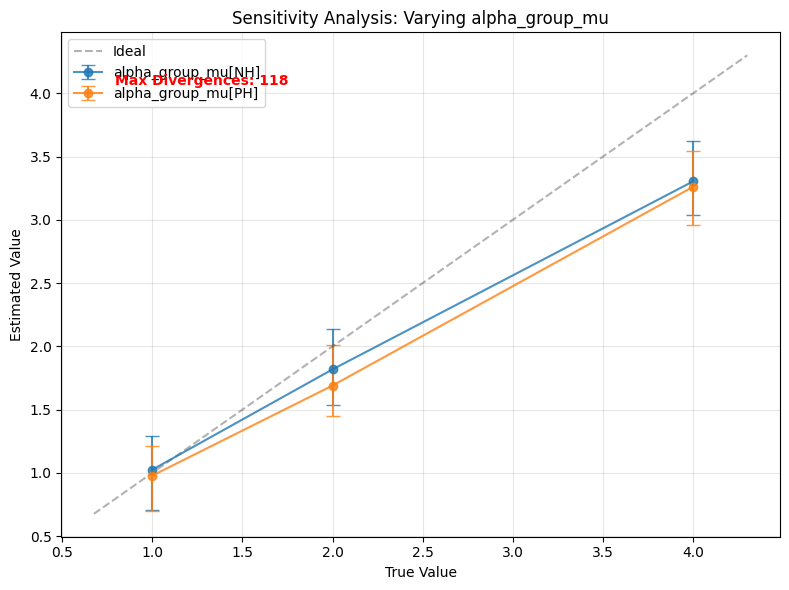

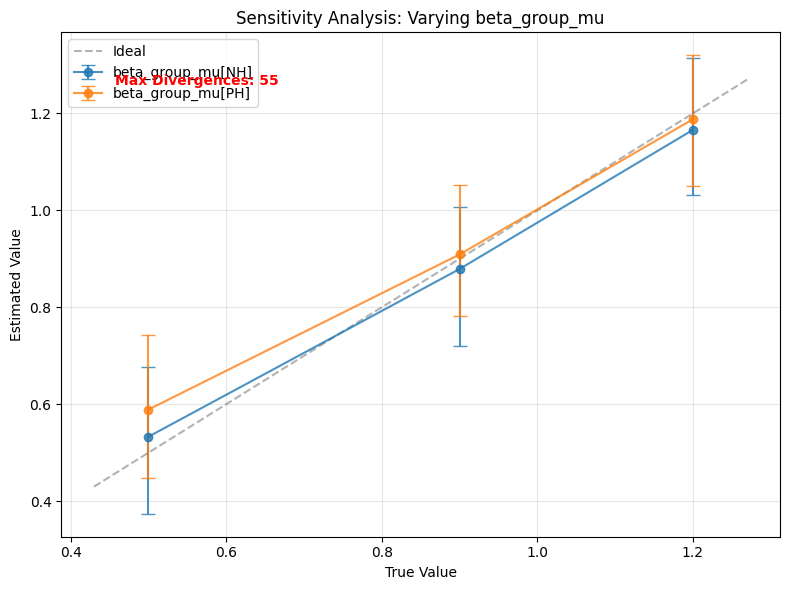

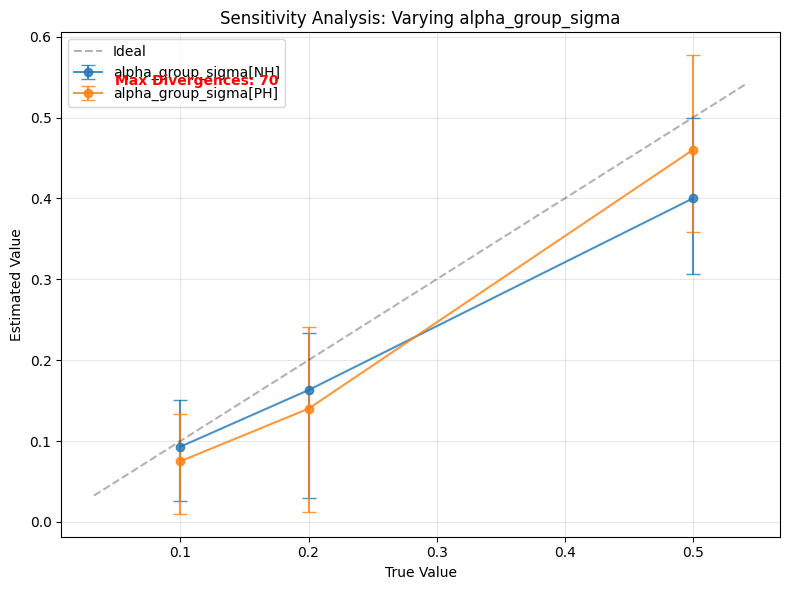

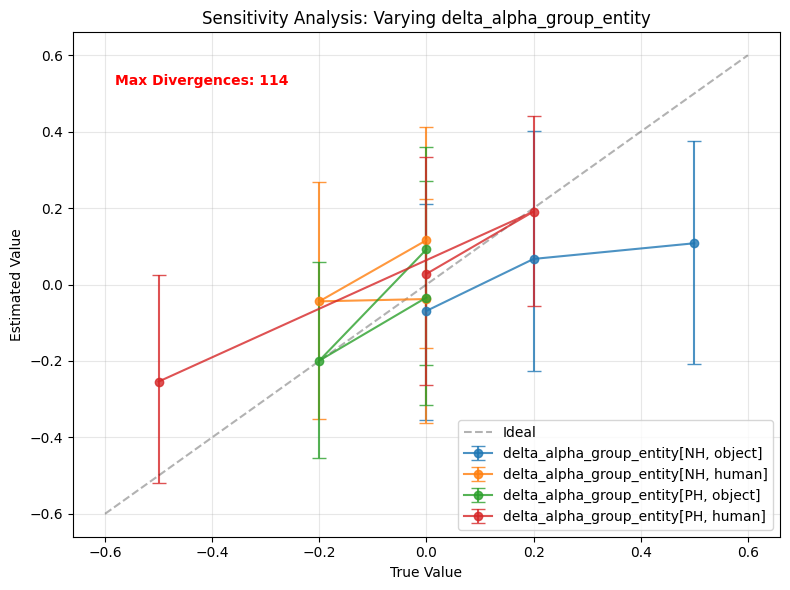

In [8]:

# Plot
plot_sensitivity(df_results)

In [9]:
df_results

,varied_param,step_index,param_measured,index_name,true_value,est_mean,hdi_lo,hdi_hi,divergences
0,alpha_group_mu,0,alpha_group_mu,alpha_group_mu[NH],1.0,1.025,0.706,1.293,118
1,alpha_group_mu,0,alpha_group_mu,alpha_group_mu[PH],1.0,0.978,0.695,1.212,118
2,alpha_group_mu,0,alpha_group_sigma,alpha_group_sigma[NH],0.1,0.087,0.010,0.143,118
3,alpha_group_mu,0,alpha_group_sigma,alpha_group_sigma[PH],0.1,0.065,0.012,0.132,118
4,alpha_group_mu,0,beta_group_mu,beta_group_mu[NH],0.5,0.519,0.396,0.651,118
...,...,...,...,...,...,...,...,...,...
251,sigma_0_group,3,delta_alpha_group_entity,"delta_alpha_group_entity[PH, human]",0.0,-0.017,-0.357,0.260,84
252,sigma_0_group,3,delta_beta_group_entity,"delta_beta_group_entity[NH, object]",0.0,-0.032,-0.199,0.145,84
253,sigma_0_group,3,delta_beta_group_entity,"delta_beta_group_entity[NH, human]",0.0,-0.047,-0.211,0.126,84
254,sigma_0_group,3,delta_beta_group_entity,"delta_beta_group_entity[PH, object]",0.0,-0.027,-0.214,0.142,84


In [18]:
from datetime import datetime
from pathlib import Path
now = datetime.now().strftime("%Y%m%d-%H%M%S")
print(now)
dir = Path("results") / "recovery"
dir.mkdir(exist_ok=True)
filename = dir / f"recovery_{now}.csv"
print(filename)
df_results.to_csv(filename)

20260106-121357
results/recovery/recovery_20260106-121357.csv
